# Fraud Detection System
#### Synthetic datasets generated by the PaySim mobile money simulator

In [49]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")


## Importing the data

In [2]:
df= pd.read_csv(r'D:\Study\Data Science + Data Analysis\Projects\Fraud Detection #2\PS_20174392719_1491204439457_log.csv')

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.size

69988820

In [6]:
df.dropna()
df.size

69988820

## What does the columns mean

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Exploratory Data Analysis (EDA) 

In [7]:
### Checking for null values
print('Null Values -', df.isnull().values.any())

Null Values - False


So, no null values 

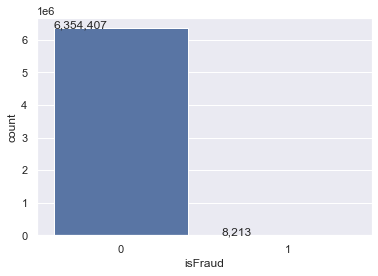

In [8]:
df['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

In [9]:
import math
a= (8213/(6354407+8213))*100
print ('The percentage of Fraud transactions is ' "%.2f" % a, '%' )

The percentage of Fraud transactions is 0.13 %


### Distribution of the Transaction Type Column 

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


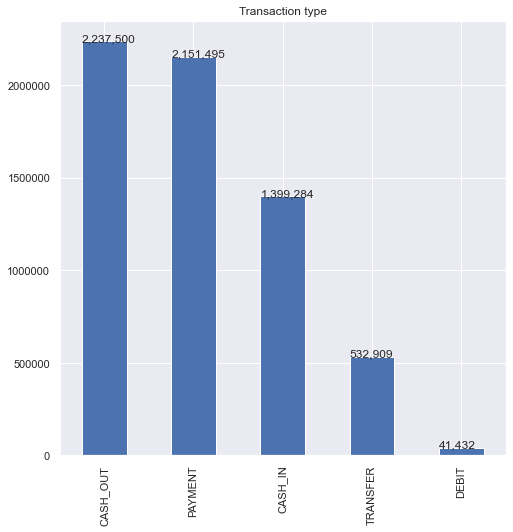

In [10]:
print(df.type.value_counts())
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

Number of transactions that is safe - 6354407 
    

Number of transactions that are Fraud but not Flagged by the system - 8197
   

 Number of transactions that are Fraud and are Flagged bt the system - 16

### Datasets with respect to Transaction types 

#### Payment 

In [11]:
payment_df = df[df["type"] == 'PAYMENT']
payment_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


#### Transfer 

In [12]:
transfer_df = df[df["type"] == 'TRANSFER']
transfer_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


#### Cash Out

In [13]:
cashout_df = df[df["type"] == 'CASH_OUT']
cashout_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


#### Cash In

In [14]:
cashin_df = df[df["type"] == 'CASH_IN']
cashin_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0


#### Debit 

In [15]:
debit_df = df[df["type"] == 'DEBIT']
debit_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.0,0.00,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.0,16997.22,0,0


### Fraud Dataset 

In [16]:
f_df = df[(df['isFraud'] == 1)] 
f_df    


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [17]:
#Fraud and non fraud distribution
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

###  Relation Between the Fraud Transactions and the transactions Flagged by the system

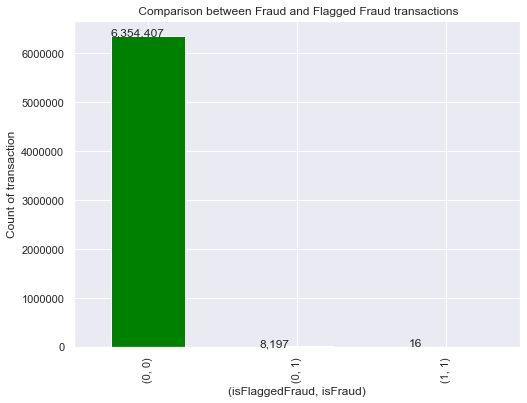

In [18]:
ax = df.groupby(['isFlaggedFraud','isFraud']).size().plot(kind='bar',figsize=(8, 6), color='green')
ax.set_title(" Comparison between Fraud and Flagged Fraud transactions")
ax.set_xlabel("(isFlaggedFraud, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### Fraud transactions and Transaction types 

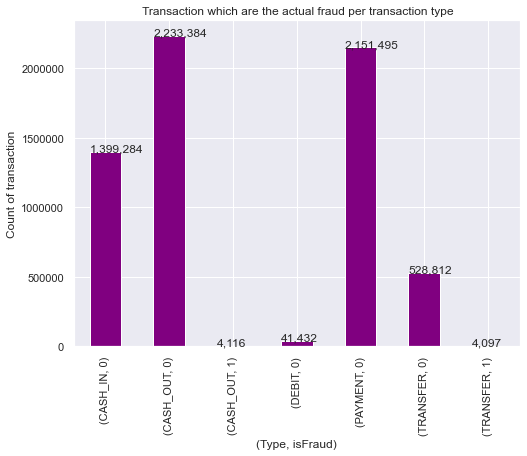

In [19]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))


d:\softwares\installed\anaconda3\envs\frauddetection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


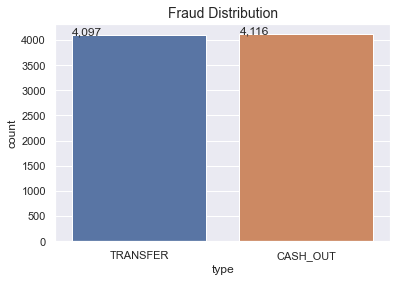

In [20]:
ax=sns.countplot('type', data=f_df)
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

From the above graph we can see that the Fraudulent transafers are from CASH_OUT(4116) and TRANSFER(4097) , transaction types

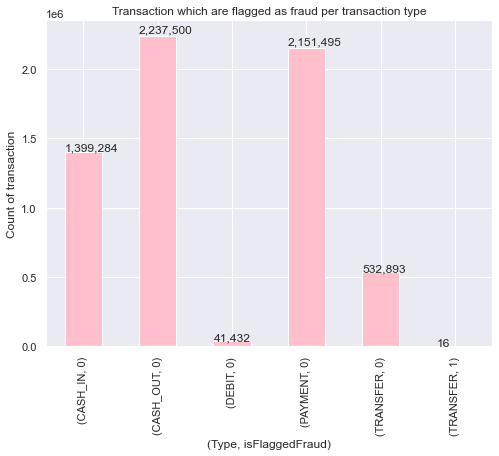

In [21]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar',figsize=(8, 6), color='pink')
ax.set_title("Transaction which are flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

From the above graph we can see that the transfers that are Flagged Fraud are from TRANSFER(16) transaction type.
So out of 4097 Fraud Transfers only 16 were flagged by the system.

So, only 16 out of 6 million transactions were flagged by the system. It is safe to say the system uses an unreasonable parameter to detect fraud transactions

Conclusion: Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.

### Dealing with Account Ids 'nameOrig' and 'nameDest'

In [22]:
print('All Transactions ',df['nameOrig'].size)
print('Unique Transactions ',df['nameOrig'].unique().size)
print('Transactions from existing accounts ',df['nameOrig'].size-df['nameOrig'].unique().size)


All Transactions  6362620
Unique Transactions  6353307
Transactions from existing accounts  9313


In [23]:
print('All Transactions ',df['nameDest'].size)
print('Unique Transactions ',df['nameDest'].unique().size)
print('Transactions from existing accounts ',df['nameDest'].size-df['nameOrig'].unique().size)


All Transactions  6362620
Unique Transactions  2722362
Transactions from existing accounts  9313


In [24]:
print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originator accounts for CASH_IN transactions? False


In [25]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [26]:
print('\nAre there merchants among any originator accounts? {}'.format(\
      df.nameOrig.str.contains('M').any())) 

print('\nAre there any transactions having merchants among destination accounts\
 other than the PAYMENT type? {}'.format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accounts other than the PAYMENT type? False


Merchant accounts are not included in the  fraudulent Transactions. Merchant accounts were only identified in 'Payment' type transactions

Conclusion: We do not get any benificial information from the nameOrig or nameDest, so we'll be dropping these columns

## Feature Engineering and Data Cleaning 

From the exploratory data analysis (EDA), we know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis.

In [27]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)


In [28]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [29]:
df_new = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


### Taking note of the balances before and after transactions 

As most of the transactions has errors in showing the account balances before and after transaction , we calculate the error

In [30]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


In [31]:
# flatten the subsetted dataframe of floats into an array of floats
relevant_cols = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()
# number of observations with negative numbers
num_neg_amt = sum(n < 0 for n in relevant_cols)
# number of observations where the amount given is greater than the amount that is in the sender's account
num_amt_oldgiver = sum(df["amount"] > df["oldbalanceOrg"]) 
# number of observations where the amount received is greater than the amount that is in the receiver's account
num_amt_newreceiver = sum(df["amount"] > df["newbalanceDest"]) 

print("number of observations with negative numbers: ", num_neg_amt)
print("number of observations where the amount given is greater than the amount that is in the sender's account: "
      , num_amt_oldgiver)
print("number of observations where the amount received is greater than the amount that is in the receiver's account: "
      , num_amt_newreceiver)

number of observations with negative numbers:  0
number of observations where the amount given is greater than the amount that is in the sender's account:  4079080
number of observations where the amount received is greater than the amount that is in the receiver's account:  2661141


From the above results, we can conclude that :
1. There is erronous results in the new and old balance accounts for both sender and receiver
2. Some of this erronous results are due to fraudulent transactions
3. We cannot get rid of this features as well so we will let them be and add a new feature called 'errorbalance'

In [32]:
df_new["errorbalanceOrg"] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
df_new["errorbalanceDest"] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest

C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_21476/3749051713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["errorbalanceOrg"] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_21476/3749051713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["errorbalanceDest"] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest


In [33]:
# Subsetting data into observations with fraud and valid transactions:
fraud = df_new[df_new["isFraud"] == 1]
valid = df_new[df_new["isFraud"] == 0]

In [34]:
print("Proportion of fraudulent transactions with errorBalanceDest > 0: ", len(fraud[fraud.errorbalanceDest > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(valid[valid.errorbalanceDest > 0])/len(valid))
print("Proportion of fraudulent transactions with errorBalanceOrg > 0: ", len(fraud[fraud.errorbalanceOrg > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(valid[valid.errorbalanceOrg > 0])/len(valid))

Proportion of fraudulent transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.19744942067832985
Proportion of fraudulent transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.9067180605576143


Conclusions:
1. Most of the transactions where errorbalanceDest > 0 has high chance of being fraud
2. Valid transactions are most likely to have errorbalanceOrig > 0 

### Taking note of the Step feature

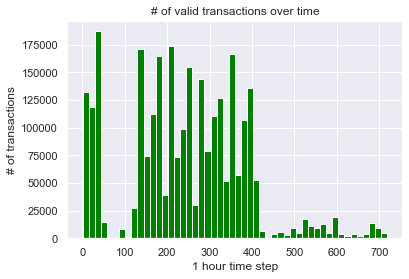

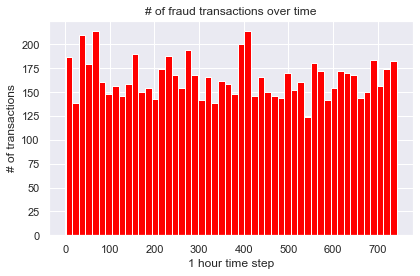

In [35]:
# Time patterns

bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()


Things to note:
1. A lot of Valid transactions occur during 0 to 60 hours and then again 120 to 400 hrs
2. The fraud transactions dont change much throughout the time frame

####  Converting the step feature from hours into days

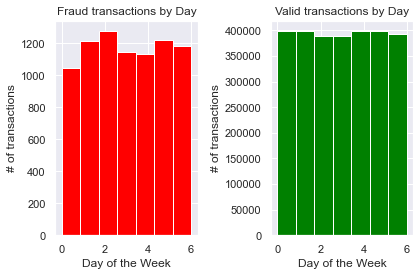

In [36]:
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

The distribution of fraud and valid dont show much of differnce to work with so I won't add this as a feature 

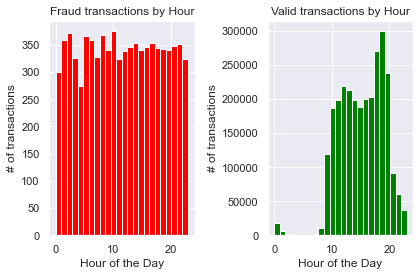

In [37]:
# plotting scatterplot of the hours of days, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, there is strong evidence to suggest that from hour 0 to hour 9, valid transactions very rarely occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9.

So I will add a new feature hour_of_day which is just the [(step column) %24]

In [38]:
dataset = df_new.copy()


# adding feature HourOfDay to Dataset1 
dataset["HourOfDay"] = np.nan # initializing feature column
dataset.HourOfDay = df_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(dataset))

Head of dataset1: 
     step      type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2      1  TRANSFER     181.00          181.0             0.0             0.0   
3      1  CASH_OUT     181.00          181.0             0.0         21182.0   
15     1  CASH_OUT  229133.94        15325.0             0.0          5083.0   
19     1  TRANSFER  215310.30          705.0             0.0         22425.0   
24     1  TRANSFER  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  isFraud  errorbalanceOrg  errorbalanceDest  HourOfDay  
2             0.00        1             0.00             181.0          1  
3             0.00        1             0.00           21363.0          1  
15        51513.44        0        213808.94          182703.5          1  
19            0.00        0        214605.30          237735.3          1  
24      2719172.89        0        300850.89        -2401220.0          1  


### Taking note of amount column 

In [39]:
print('CASE AMOUNT STATISTICS')
print('\nNON-FRAUD CASE AMOUNT STATS')
print(valid['amount'].describe())
print('\nFRAUD CASE AMOUNT STATS')
print(fraud['amount'].describe())

CASE AMOUNT STATISTICS

NON-FRAUD CASE AMOUNT STATS
count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64

FRAUD CASE AMOUNT STATS
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


It seems that during fraudulent transactions, the amount moved is capped at 10 million currency units.

Whereas for valid transactions, the amount moved is capped at about 92.4 million currency units.

Only valid transaction involved amounts larger than 10,000,000, however these transactions make up less than 0.01% of the relevant data.

When the amounts moved is less than 10,000,000 there doesn't seem to be a large difference fraudulent and valid transactions.

I leave the variable amount as it is and will not be creating a feature out of it.

In [40]:
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDay
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1


### Handling Categorical Variables 

We will perfrom one-hot-encoding on the 'type' column which is a categorical feature

One-Hot encoding involves creating indicator variables for each category in a categorical variable.

If an observation is part of a particular category (e.g. the transaction type is CASH_OUT), the indicator variable associated with the category would be 1. If it isn't part of a particular category, then the indicator variable associated with that category would be 0.

In [41]:
dataset = pd.get_dummies(dataset,prefix=['type'])

In [42]:
dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDay,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1,0,1


In [43]:
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed(21)

X = dataset.drop("isFraud",1)
Y = dataset.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\PRITAM~1\AppData\Local\Temp/ipykernel_21476/3108586457.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop("isFraud",1)


In [44]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2216327, 11)
Shape of X_test:  (554082, 11)


In [46]:
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

## Handling Imbalanced Data


We will use undersampling when we have huge data and undersampling the majority call won't effect the data. 

In [50]:

# check version number
import imblearn
print(imblearn.__version__)
# check version number
import imblearn
print(imblearn.__version__)

0.8.1
0.8.1


In [51]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)                              
                              

Resampled shape of X:  (16426, 11)
Resampled shape of Y:  (16426,)
Counter({0: 8213, 1: 8213})


### Model 1: Random Forest: Balanced Data

In [52]:
# Train model
parametersRF = {'n_estimators':15,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(train_X, train_Y)
 
# Predict on testing set
predictionsRF = RF.predict(test_X)
 
     
# Evaluating model
CM_RF = confusion_matrix(test_Y,predictionsRF)
CR_RF = classification_report(test_Y,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(test_Y, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[2477    2]
 [   9 2440]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2449

    accuracy                           1.00      4928
   macro avg       1.00      1.00      1.00      4928
weighted avg       1.00      1.00      1.00      4928

Area Under Curve : 
 0.9977591268492824


## Important Features 

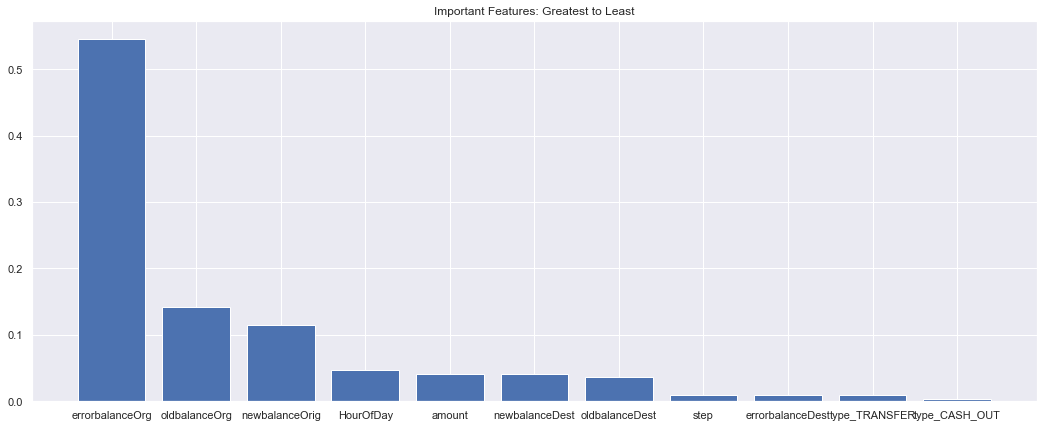

In [53]:
ncols = len(X.columns)
x = np.arange(ncols)

# getting importances of features
importances = RF.feature_importances_

# getting the indices of the most important feature to least important
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()

errorBalanceOrg is the most important feature by far for classifying transactions followed by oldBalanceOrg and newBalanceOrig.

## Conclusion 

1. The dataset is huge with over million data points, and the ratio of fraud to valid data is heavily skewed towads valid data
2. Feature engineering and creation of two new features namely 'errorbalance' and 'HourofDay' yielded fruitful results.
3. Random Forest Classifier is the best model in the given situation as it is fairly accurate in predicting both fraud and valid data, and has the heigest AUC .
4. Working with such a large dataset is always a challenge and this helped me learn a lot .

Thank You!

## Saving the model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [56]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [57]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [58]:
rf_cv=RandomForestClassifier(criterion = 'gini',
 max_depth = 5,
 max_features= 'auto',
 n_estimators= 500)

In [59]:
rf_cv.fit(train_X, train_Y)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [60]:
pred=rf_cv.predict(test_X)

In [61]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.997362012987013


In [62]:
X = np.array([[135,229133.94,15325.0,50.0,5083.0,51513.44,0,237735.3,1,1,0]])
X

array([[1.3500000e+02, 2.2913394e+05, 1.5325000e+04, 5.0000000e+01,
        5.0830000e+03, 5.1513440e+04, 0.0000000e+00, 2.3773530e+05,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00]])

In [70]:
y_pred = rf_cv.predict(X)
y_pred

d:\softwares\installed\anaconda3\envs\frauddetection\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [71]:
predictions =rf_cv.predict(test_X)
predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_cv, file)